# import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
16,5.4,3.9,1.3,0.4,setosa
141,6.9,3.1,5.1,2.3,virginica
110,6.5,3.2,5.1,2.0,virginica


# Label Encoder

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
# create an object
encoder = LabelEncoder()

In [5]:
df['species'] = encoder.fit_transform(df['species'])
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,2
65,6.7,3.1,4.4,1.4,1
44,5.1,3.8,1.9,0.4,0


In [6]:
df = df.iloc[:,1:]

In [7]:
df.columns

Index(['sepal_width', 'petal_length', 'petal_width', 'species'], dtype='object')

In [26]:
df = df[df['species'] != 0][['sepal_width', 'petal_length', 'species']]

In [27]:
df.sample(3)

,sepal_width,petal_length,species
100,3.3,6.0,2
62,2.2,4.0,1
121,2.8,4.9,2


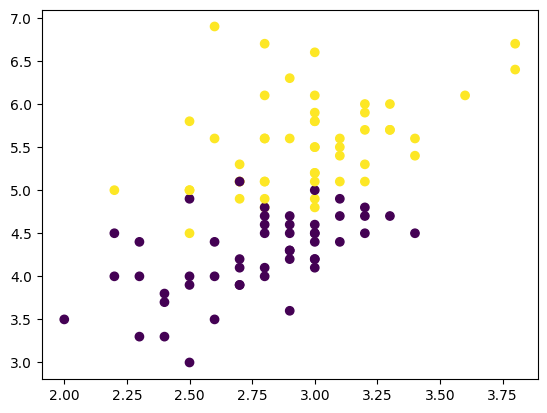

In [28]:
plt.scatter(
    df['sepal_width'],
    df['petal_length'],
    c=df['species']
)

plt.show()

In [29]:
# 10 row for training, validation, testing
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [30]:
print(df_train)
print('--'*20)

print(df_test)
print('--'*20)

print(df_val)
print('--'*20)

     sepal_width  petal_length  species
95           3.0           4.2        1
120          3.2           5.7        2
64           2.9           3.6        1
128          2.8           5.6        2
85           3.4           4.5        1
54           2.8           4.6        1
75           3.0           4.4        1
68           2.2           4.5        1
111          2.7           5.3        2
135          3.0           6.1        2
----------------------------------------
     sepal_width  petal_length  species
147          3.0           5.2        2
110          3.2           5.1        2
131          3.8           6.4        2
72           2.5           4.9        1
51           3.2           4.5        1
----------------------------------------
     sepal_width  petal_length  species
144          3.3           5.7        2
53           2.3           4.0        1
107          2.9           6.3        2
55           2.8           4.5        1
84           3.0           4.5        

# case 1 - Bagging

In [31]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y =df_bag.iloc[:, -1]

In [32]:
print(df_bag)
print('--'*20)

print(X)
print('--'*20)

print(y)
print('--'*20)

     sepal_width  petal_length  species
111          2.7           5.3        2
68           2.2           4.5        1
111          2.7           5.3        2
64           2.9           3.6        1
120          3.2           5.7        2
95           3.0           4.2        1
135          3.0           6.1        2
54           2.8           4.6        1
----------------------------------------
     sepal_width  petal_length
111          2.7           5.3
68           2.2           4.5
111          2.7           5.3
64           2.9           3.6
120          3.2           5.7
95           3.0           4.2
135          3.0           6.1
54           2.8           4.6
----------------------------------------
111    2
68     1
111    2
64     1
120    2
95     1
135    2
54     1
Name: species, dtype: int64
----------------------------------------


# import ml models

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

In [36]:
print(X_test)
print('--'*10)

print(y_test)

[[3.3 5.7]
 [2.3 4. ]
 [2.9 6.3]
 [2.8 4.5]
 [3.  4.5]]
--------------------
[2 1 2 1 1]


In [52]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [ ]:
def evaluate(clf, X, y) -> None:
    """Plot the Decision boundaries & accuracy of the given data.

    Args:
        clf : ML model
        X : X_train
        y : y_train
    Return:
        Plot the Graphs and accuracy.
    """
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    
    plot_decision_regions(X.values, y.values, clf= clf, legend=2)
    y_pred = clf.predict(X_test)
    print('--'*20)
    
    print(f"Accuracy is  {accuracy_score(y_test, y_pred)}")
    print('--'*20)

In [53]:
df_bag1 = DecisionTreeClassifier()

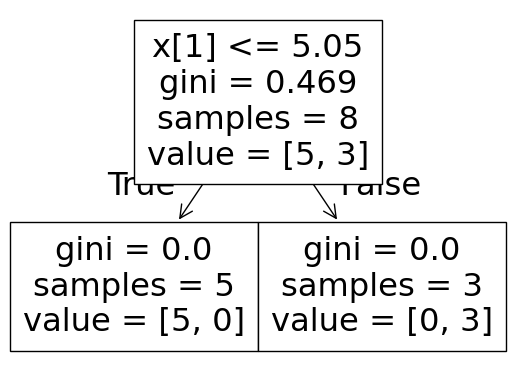

1.0


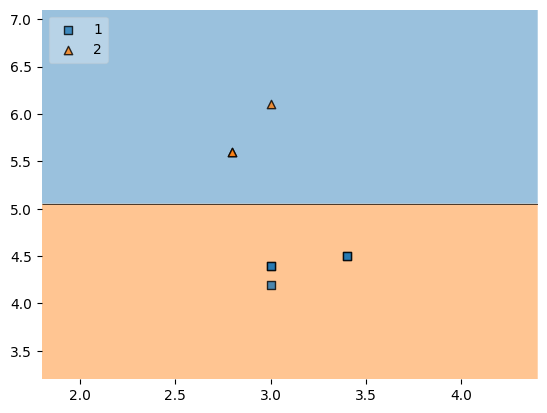

In [54]:
evaluate(df_bag1, X, y)

In [ ]:
# Data fro Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]


print(df_bag)
print('--'*20)

print(X)
print('--'*20)

print(y)
print('--'*20)

     sepal_width  petal_length  species
54           2.8           4.6        1
128          2.8           5.6        2
95           3.0           4.2        1
135          3.0           6.1        2
128          2.8           5.6        2
64           2.9           3.6        1
54           2.8           4.6        1
95           3.0           4.2        1
----------------------------------------
     sepal_width  petal_length
54           2.8           4.6
128          2.8           5.6
95           3.0           4.2
135          3.0           6.1
128          2.8           5.6
64           2.9           3.6
54           2.8           4.6
95           3.0           4.2
----------------------------------------
54     1
128    2
95     1
135    2
128    2
64     1
54     1
95     1
Name: species, dtype: int64
----------------------------------------


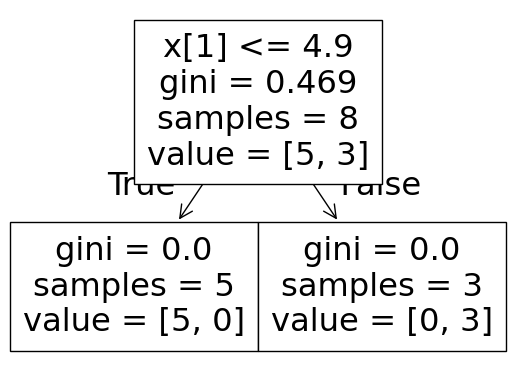

1.0


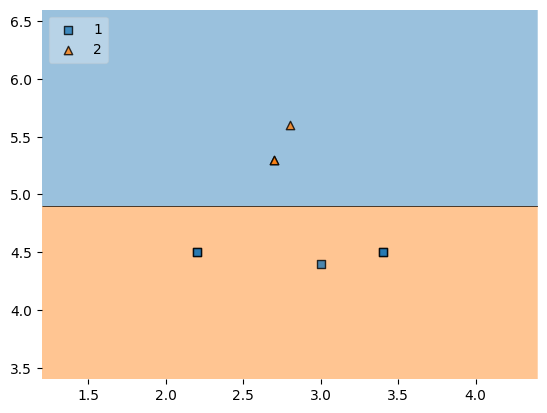

In [ ]:
df_bag2 = DecisionTreeClassifier()
evaluate(df_bag2, X, y)

In [57]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

print(df_bag)
print('--'*20)

print(X)
print('--'*20)

print(y)
print('--'*20)

     sepal_width  petal_length  species
85           3.4           4.5        1
111          2.7           5.3        2
128          2.8           5.6        2
68           2.2           4.5        1
75           3.0           4.4        1
111          2.7           5.3        2
85           3.4           4.5        1
68           2.2           4.5        1
----------------------------------------
     sepal_width  petal_length
85           3.4           4.5
111          2.7           5.3
128          2.8           5.6
68           2.2           4.5
75           3.0           4.4
111          2.7           5.3
85           3.4           4.5
68           2.2           4.5
----------------------------------------
85     1
111    2
128    2
68     1
75     1
111    2
85     1
68     1
Name: species, dtype: int64
----------------------------------------


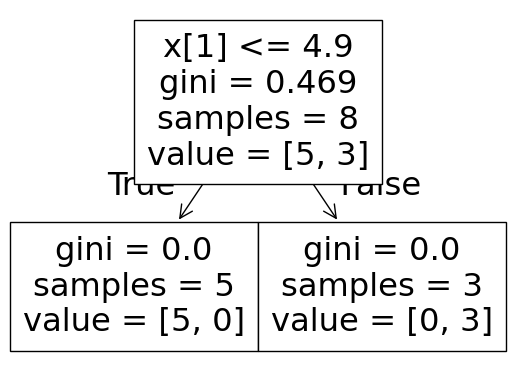

1.0


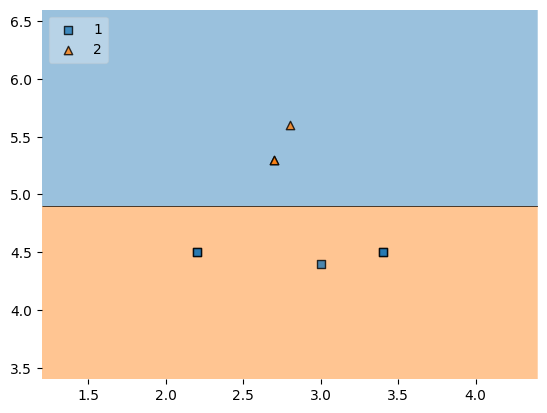

In [58]:
df_bag3 = DecisionTreeClassifier()
evaluate(df_bag3, X, y)

# Predict

In [ ]:
# Lets check the know value 
# See what our three model give species output
df.loc[130]
print('--'*20)

print("Predictor Value of Decision Tree 1 -> ",df_bag1.predict(np.array([2.8, 6.1]).reshape(1,2)))
print("Predictor Value of Decision Tree 2 -> ",df_bag2.predict(np.array([2.8, 6.1]).reshape(1,2)))
print("Predictor Value of Decision Tree 3 -> ",df_bag3.predict(np.array([2.8, 6.1]).reshape(1,2)))

sepal_width     2.8
petal_length    6.1
species         2.0
Name: 130, dtype: float64

In [77]:
print(df.iloc[23])
print('--'*20)

print("Predictor Value of Decision Tree 1 -> ",df_bag1.predict(np.array([3.4, 5.4]).reshape(1,2)))
print("Predictor Value of Decision Tree 2 -> ",df_bag2.predict(np.array([3.4, 5.4]).reshape(1,2)))
print("Predictor Value of Decision Tree 3 -> ",df_bag3.predict(np.array([3.4, 5.4]).reshape(1,2)))

sepal_width     3.4
petal_length    5.4
species         2.0
Name: 148, dtype: float64
----------------------------------------
Predictor Value of Decision Tree 1 ->  [2]
Predictor Value of Decision Tree 2 ->  [2]
Predictor Value of Decision Tree 3 ->  [2]


In [81]:
print(df.iloc[97])
print('--'*20)

print("Predictor Value of Decision Tree 1 -> ",df_bag1.predict(np.array([3.0, 5.2]).reshape(1,2)))
print("Predictor Value of Decision Tree 2 -> ",df_bag2.predict(np.array([3.0, 5.2]).reshape(1,2)))
print("Predictor Value of Decision Tree 3 -> ",df_bag3.predict(np.array([3.0, 5.2]).reshape(1,2)))

sepal_width     3.0
petal_length    5.2
species         2.0
Name: 147, dtype: float64
----------------------------------------
Predictor Value of Decision Tree 1 ->  [2]
Predictor Value of Decision Tree 2 ->  [2]
Predictor Value of Decision Tree 3 ->  [2]


# Pasting
- Row sampling without replacement

In [82]:
df_train

,sepal_width,petal_length,species
95,3.0,4.2,1
120,3.2,5.7,2
64,2.9,3.6,1
128,2.8,5.6,2
85,3.4,4.5,1
54,2.8,4.6,1
75,3.0,4.4,1
68,2.2,4.5,1
111,2.7,5.3,2
135,3.0,6.1,2


In [83]:
df_train.sample(8)

,sepal_width,petal_length,species
120,3.2,5.7,2
85,3.4,4.5,1
64,2.9,3.6,1
54,2.8,4.6,1
75,3.0,4.4,1
111,2.7,5.3,2
68,2.2,4.5,1
128,2.8,5.6,2


# Radom subspaces

In [ ]:
# row randomly choose
iris_df = sns.load_dataset('iris')
df1 = iris_df.sample(10)
df1

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor
109,7.2,3.6,6.1,2.5,virginica
51,6.4,3.2,4.5,1.5,versicolor
13,4.3,3.0,1.1,0.1,setosa
123,6.3,2.7,4.9,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica
22,4.6,3.6,1.0,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
134,6.1,2.6,5.6,1.4,virginica


In [ ]:
# column randomly choose
df1.sample(3, replace=True, axis=1)

,petal_length,species,petal_length
59,3.9,versicolor,3.9
109,6.1,virginica,6.1
51,4.5,versicolor,4.5
13,1.1,setosa,1.1
123,4.9,virginica,4.9
139,5.4,virginica,5.4
22,1.0,setosa,1.0
141,5.1,virginica,5.1
146,5.0,virginica,5.0
134,5.6,virginica,5.6


# Radom Patches

In [96]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor
109,7.2,3.6,6.1,2.5,virginica
51,6.4,3.2,4.5,1.5,versicolor
13,4.3,3.0,1.1,0.1,setosa
123,6.3,2.7,4.9,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica
22,4.6,3.6,1.0,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
134,6.1,2.6,5.6,1.4,virginica


In [112]:
# row and column both sampling
# df1.sample(8, replace=True) -> This is row only
# axis = 1 -> gives the column sampling

df1.sample(8, replace=True).sample(3, replace=True, axis=1)

,sepal_width,sepal_width,species
59,2.7,2.7,versicolor
22,3.6,3.6,setosa
134,2.6,2.6,virginica
22,3.6,3.6,setosa
109,3.6,3.6,virginica
109,3.6,3.6,virginica
141,3.1,3.1,virginica
139,3.1,3.1,virginica


- 20:16 IST
- 18-06-2025